In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Cargamos el archivo diamonds.csv
data= pd.read_csv('diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53880,53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53881,53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53882,53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53883,53938,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74


In [3]:
#Identificamos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Limpieza de Nulos**

Vemos que tenemos valores nulos solo en variables numéricas, por lo que aplicaremos diferentes metodos para lidiar con esos valores nulos

In [4]:
#Sustituir por la media
mean_carat=data['carat'].mean() 
data['carat'].fillna(value=mean_carat, inplace=True) 

#Sustituir por el objeto "anterior" de la columna
data["depth"] =data["depth"].fillna(method="bfill") 

#Sustituir por la mediana
median_table=data['table'].median() 
data['table'].fillna(value=median_table, inplace=True) 

median_price=data['price'].median() 
data['price'].fillna(value=median_price, inplace=True) 

#Sustituir por la media
mean_x=data['x'].mean() 
data['x'].fillna(value=mean_x, inplace=True) 

mean_y=data['y'].mean() 
data['y'].fillna(value=mean_y, inplace=True) 

mean_z=data['z'].mean() 
data['z'].fillna(value=mean_z, inplace=True) 

In [5]:
valores_nulos=data.isnull().sum().sum()
valores_nulos

0

**Limpieza de Outliers**

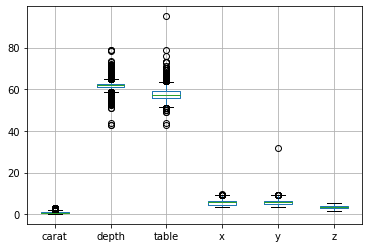

In [6]:
#Diagrama para ver la distribución de los datos de las variables numéricas
boxplot = data.boxplot(column=['carat', 'depth', 'table','x','y','z'])  

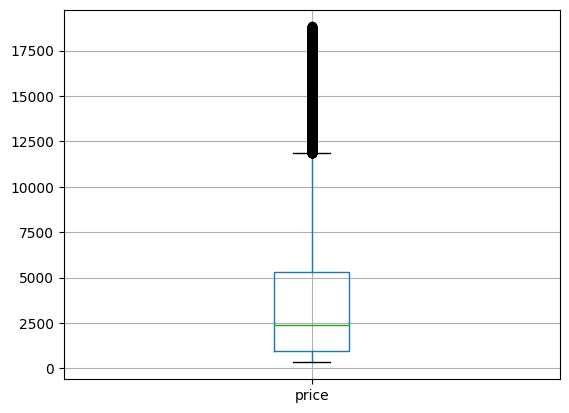

In [7]:
boxplot = data.boxplot(column=['price'])  

In [8]:
#Se aplicará el metodo de Desviación Estandar con 3 desviaciones debido a que 
#así cubrimos el 99% de nuestros datos y dejamos la menor cantidad de valores fuera

#Carat

y=data["carat"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers_carat= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_carat

Limite superior permitido 2.2056942343648585
Limite inferior permitido -0.6132817338757863


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
13749,13757,2.22,Fair,J,I1,66.7,56.0,5607.0,8.04,8.02,5.36
14130,14138,2.27,Fair,J,I1,67.6,55.0,5733.0,8.05,8.00,5.43
15675,15684,2.49,Fair,J,I1,66.3,58.0,6289.0,8.26,8.18,5.45
16330,16341,2.21,Premium,H,I1,62.2,58.0,6535.0,8.31,8.27,5.16
16428,16439,2.22,Fair,H,I1,70.1,55.0,6564.0,7.77,7.74,5.44
...,...,...,...,...,...,...,...,...,...,...,...
27676,27726,2.36,Premium,H,SI2,59.4,58.0,18745.0,8.69,8.75,5.18
27677,27727,2.61,Ideal,I,SI2,62.1,56.0,18756.0,8.85,8.73,5.46
27681,27731,2.55,Premium,I,VS1,61.8,62.0,18766.0,8.70,8.65,5.36
27693,27744,2.29,Premium,I,SI1,61.8,59.0,18797.0,8.52,8.45,5.24


In [9]:
#depth

y2=data["depth"]
Limite_Superior2= y2.mean() + 3*y2.std()
Limite_Inferior2= y2.mean() - 3*y2.std()
print("Limite superior permitido", Limite_Superior2)
print("Limite inferior permitido", Limite_Inferior2)

#Encontramos Ouliers
outliers_depth= data[(y2>Limite_Superior2)|(y2<Limite_Inferior2)]
outliers_depth

Limite superior permitido 66.04080044921432
Limite inferior permitido 57.455708783410735


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2,2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
91,91,0.86,Fair,E,SI2,55.1,69.0,2757.0,6.45,6.33,3.52
97,97,0.96,Fair,F,SI2,66.3,62.0,2759.0,6.27,5.95,4.07
204,204,0.98,Fair,H,SI2,67.9,60.0,2777.0,6.05,5.97,4.08
221,221,0.70,Good,E,VS1,57.2,62.0,2782.0,5.81,5.77,3.31
...,...,...,...,...,...,...,...,...,...,...,...
53672,53727,0.78,Fair,E,SI2,66.9,57.0,2721.0,5.70,5.66,3.60
53701,53756,0.84,Fair,G,VS1,55.6,64.0,2724.0,6.42,6.32,3.54
53702,53757,0.72,Fair,F,VS2,55.4,64.0,2724.0,6.06,5.97,3.34
53745,53800,0.90,Fair,I,VS1,68.7,62.0,2732.0,5.83,5.79,3.99


In [10]:
#table

y3=data["table"]
Limite_Superior3= y3.mean() + 3*y3.std()
Limite_Inferior3= y3.mean() - 3*y3.std()
print("Limite superior permitido", Limite_Superior3)
print("Limite inferior permitido", Limite_Inferior3)

#Encontramos Ouliers
outliers_table= data[(y3>Limite_Superior3)|(y3<Limite_Inferior3)]
outliers_table

Limite superior permitido 64.15825069412362
Limite inferior permitido 50.75535420519899


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2,2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
91,91,0.86,Fair,E,SI2,55.1,69.0,2757.0,6.45,6.33,3.52
227,227,0.84,Fair,G,SI1,55.1,67.0,2782.0,6.39,6.20,3.47
296,296,0.70,Fair,G,VVS1,58.8,66.0,2797.0,5.81,5.90,3.44
314,314,0.76,Fair,G,VS1,59.0,70.0,2800.0,5.89,5.80,3.46
...,...,...,...,...,...,...,...,...,...,...,...
53487,53542,0.78,Fair,H,VS2,54.7,67.0,2691.0,6.25,6.15,3.40
53605,53660,0.71,Fair,F,VS1,57.3,67.0,2707.0,5.96,5.76,3.36
53640,53695,0.75,Good,E,VS2,59.7,65.0,2717.0,5.85,5.80,3.48
53642,53697,0.70,Fair,H,VVS2,64.5,65.0,2717.0,5.52,5.45,3.54


In [11]:
#x

y4=data["x"]
Limite_Superior4= y4.mean() + 3*y4.std()
Limite_Inferior4= y4.mean() - 3*y4.std()
print("Limite superior permitido", Limite_Superior4)
print("Limite inferior permitido", Limite_Inferior4)

#Encontramos Ouliers
outliers_x= data[(y4>Limite_Superior4)|(y4<Limite_Inferior4)]
outliers_x

Limite superior permitido 9.078215311101992
Limite inferior permitido 2.3807332336942006


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
19852,19866,2.68,Premium,G,I1,58.6,60.0,8419.0,9.11,9.07,5.33
22722,22741,3.01,Fair,H,I1,56.1,62.0,10761.0,9.54,9.38,5.31
22812,22831,3.00,Good,I,I1,57.0,64.0,10863.0,9.38,9.31,5.33
23560,23580,2.72,Ideal,H,I1,59.6,55.0,11594.0,9.17,9.13,5.45
24789,24816,3.00,Premium,G,I1,59.7,60.0,13203.0,9.42,9.26,5.58
25433,25460,3.01,Premium,G,SI2,59.8,58.0,14220.0,9.44,9.37,5.62
25751,25778,2.58,Very Good,D,SI2,58.9,63.0,14749.0,9.08,9.01,5.33
25823,25850,3.00,Good,J,SI2,59.3,64.0,14918.0,9.32,9.19,5.50
26894,26932,3.00,Premium,I,SI2,60.7,59.0,16970.0,9.30,9.14,5.60
26977,27016,2.71,Premium,E,SI2,60.4,59.0,17146.0,9.13,9.03,5.48


In [12]:
#price

y5=data["price"]
Limite_Superior5= y5.mean() + 3*y5.std()
Limite_Inferior5= y5.mean() - 3*y5.std()
print("Limite superior permitido", Limite_Superior5)
print("Limite inferior permitido", Limite_Inferior5)

#Encontramos Ouliers
outliers_price= data[(y5>Limite_Superior5)|(y5<Limite_Inferior5)]
outliers_price

Limite superior permitido 15864.638410926327
Limite inferior permitido -8014.8239170968745


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
26348,26381,2.08,Premium,E,SI2,62.3,59.0,15873.0,8.22,8.16,5.10
26349,26382,2.04,Ideal,H,SI2,61.2,56.0,15874.0,8.19,8.25,5.03
26350,26383,1.30,Ideal,E,IF,62.3,54.0,15874.0,6.97,7.03,4.36
26351,26384,2.02,Very Good,G,SI2,62.8,55.0,15877.0,8.06,8.11,5.08
26352,26385,1.23,Very Good,E,VVS1,61.2,59.0,15878.0,6.90,6.98,4.25
...,...,...,...,...,...,...,...,...,...,...,...
27694,27745,2.00,Very Good,H,SI1,62.8,57.0,18803.0,7.95,8.00,5.01
27695,27746,2.07,Ideal,G,SI2,62.5,55.0,18804.0,8.20,8.13,5.11
27696,27747,1.51,Ideal,G,IF,61.7,55.0,18806.0,7.37,7.41,4.56
27697,27748,2.00,Very Good,G,SI1,63.5,56.0,18818.0,7.90,7.97,5.04


In [13]:
#y

y6=data["y"]
Limite_Superior6= y6.mean() + 3*y6.std()
Limite_Inferior6= y6.mean() - 3*y6.std()
print("Limite superior permitido", Limite_Superior6)
print("Limite inferior permitido", Limite_Inferior6)

#Encontramos Ouliers
outliers_y= data[(y6>Limite_Superior6)|(y6<Limite_Inferior6)]
outliers_y

Limite superior permitido 9.073585685208744
Limite inferior permitido 2.3900700455251185


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
22722,22741,3.01,Fair,H,I1,56.1,62.0,10761.0,9.54,9.38,5.31
22812,22831,3.00,Good,I,I1,57.0,64.0,10863.0,9.38,9.31,5.33
23560,23580,2.72,Ideal,H,I1,59.6,55.0,11594.0,9.17,9.13,5.45
24789,24816,3.00,Premium,G,I1,59.7,60.0,13203.0,9.42,9.26,5.58
25433,25460,3.01,Premium,G,SI2,59.8,58.0,14220.0,9.44,9.37,5.62
25823,25850,3.00,Good,J,SI2,59.3,64.0,14918.0,9.32,9.19,5.50
26894,26932,3.00,Premium,I,SI2,60.7,59.0,16970.0,9.30,9.14,5.60
27470,27514,3.01,Premium,I,SI2,60.2,59.0,18242.0,9.36,9.31,5.62
27589,27638,3.04,Premium,I,SI2,59.3,60.0,18559.0,9.51,9.46,5.62
27600,27649,3.01,Good,H,SI2,57.6,64.0,18593.0,9.44,9.38,5.42


In [14]:
#z

y7=data["z"]
Limite_Superior7= y7.mean() + 3*y7.std()
Limite_Inferior7= y7.mean() - 3*y7.std()
print("Limite superior permitido", Limite_Superior7)
print("Limite inferior permitido", Limite_Inferior7)

#Encontramos Ouliers
outliers_z= data[(y7>Limite_Superior7)|(y7<Limite_Inferior7)]
outliers_z

Limite superior permitido 5.605483181807177
Limite inferior permitido 1.4707252225903011


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
20448,20462,2.74,Fair,J,I1,64.9,61.0,8807.0,8.76,8.66,5.65
25433,25460,3.01,Premium,G,SI2,59.8,58.0,14220.0,9.44,9.37,5.62
27026,27065,2.74,Very Good,H,SI2,63.3,58.0,17184.0,8.88,8.84,5.61
27470,27514,3.01,Premium,I,SI2,60.2,59.0,18242.0,9.36,9.31,5.62
27589,27638,3.04,Premium,I,SI2,59.3,60.0,18559.0,9.51,9.46,5.62
27634,27684,3.01,Premium,J,SI2,60.7,59.0,18710.0,9.35,9.22,5.64


In [15]:
#Creamos un nuevo dataframe con los valores ya sustituidos
data2=data[(y<=Limite_Superior)&(y>=Limite_Inferior)] 
data2["carat"]=data2["carat"].fillna(round(data["carat"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_13677/2743125992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["carat"]=data2["carat"].fillna(round(data["carat"].mean(),2))


In [16]:
data2=data[(y2<=Limite_Superior2)&(y2>=Limite_Inferior2)] 
data2["depth"]=data2["depth"].fillna(round(data["depth"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_13677/727645140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["depth"]=data2["depth"].fillna(round(data["depth"].mean(),2))


In [17]:
data2=data[(y3<=Limite_Superior3)&(y3>=Limite_Inferior3)] 
data2["table"]=data2["table"].fillna(round(data["table"].median(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_13677/1440715820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["table"]=data2["table"].fillna(round(data["table"].median(),2))


In [18]:
data2=data[(y4<=Limite_Superior4)&(y4>=Limite_Inferior4)] 
data2["x"]=data2["x"].fillna(round(data["x"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_13677/928572613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["x"]=data2["x"].fillna(round(data["x"].mean(),2))


In [19]:
data2=data[(y5<=Limite_Superior5)&(y5>=Limite_Inferior5)] 
data2["price"]=data2["price"].fillna(round(data["price"].median(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_13677/2525866675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["price"]=data2["price"].fillna(round(data["price"].median(),2))


In [20]:
data2=data[(y6<=Limite_Superior6)&(y6>=Limite_Inferior6)] 
data2["y"]=data2["y"].fillna(round(data["y"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_13677/2835758671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["y"]=data2["y"].fillna(round(data["y"].mean(),2))


In [21]:
data2=data[(y7<=Limite_Superior7)&(y7>=Limite_Inferior7)] 
data2["z"]=data2["z"].fillna(round(data["z"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_13677/28414975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["z"]=data2["z"].fillna(round(data["z"].mean(),2))


In [22]:
data2.to_csv("diamonds_clean.csv")